In [1]:
import json
from functools import reduce
from operator import add

import pandas as pd
from pandas.io.json import json_normalize

In [2]:
from graph_tool.all import *
from collections import defaultdict

In [3]:
subway_file = './subway_beijing.json'
with open(subway_file, encoding="utf8") as f:
    subway_data = json.load(f)

subway_l = json_normalize(subway_data["l"])

sts = subway_l["st"].apply(lambda x: [i['n'] for i in x])
nodes = reduce(add, sts)

nodes_kn = []
for kn, n in zip(subway_l['kn'], sts.apply(len)):
    nodes_kn += [kn] * n

In [4]:
node_line_dict = defaultdict(lambda : set())
for n, kn in zip(nodes, nodes_kn):
    node_line_dict[n].add(kn)

In [5]:
edges = []

for j in range(len(subway_l['kn'])):
    for i in range(len(sts[j])-1):
        edges.append([sts[j][i], sts[j][i+1]])

In [6]:
subway_g = Graph(directed=False)

subway_g.vp.name = subway_g.add_edge_list(edges, hashed=True)

subway_g.vp.lines = subway_g.new_vp("object", vals=[node_line_dict[n] for n in subway_g.vp.name])

In [7]:
len(edges)

381

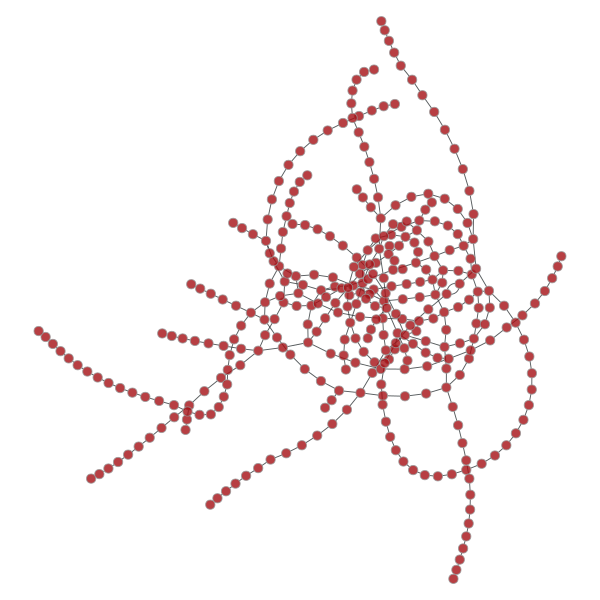

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fdafc64f5f8, at 0x7fdafc64f898>

In [9]:
graph_draw(subway_g)

In [36]:
len(nodes)

405

In [10]:
shortest_path(subway_g, subway_g.vertex(0), subway_g.vertex(21))

([<Vertex object with index '0' at 0x7fdae7a1b6f0>,
  <Vertex object with index '124' at 0x7fdae7a1b690>,
  <Vertex object with index '123' at 0x7fdae7a1b630>,
  <Vertex object with index '122' at 0x7fdae7a1b5d0>,
  <Vertex object with index '121' at 0x7fdae7a1b570>,
  <Vertex object with index '120' at 0x7fdae7a1b510>,
  <Vertex object with index '119' at 0x7fdae7a1b450>,
  <Vertex object with index '219' at 0x7fdae7a1b3f0>,
  <Vertex object with index '14' at 0x7fdae7a1b390>,
  <Vertex object with index '15' at 0x7fdae7a1b330>,
  <Vertex object with index '16' at 0x7fdae7a1b2d0>,
  <Vertex object with index '17' at 0x7fdae7a1b270>,
  <Vertex object with index '18' at 0x7fdae7a1b150>,
  <Vertex object with index '19' at 0x7fdae7a1b030>,
  <Vertex object with index '20' at 0x7fdae7a1b0f0>,
  <Vertex object with index '21' at 0x7fdae7a1b1b0>],
 [<Edge object with source '124' and target '0' at 0x7fdae7a22030>,
  <Edge object with source '123' and target '124' at 0x7fdafc66bf30>,
  <Edge

In [11]:
geo_station = subway_l["st"].apply(lambda sl: [i['sl'] for i in sl])
geo_nodes = reduce(add, geo_station)
nodes_with_geo = dict(zip(nodes, geo_nodes))

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np 

In [13]:
G = nx.Graph()  

In [14]:
G.add_nodes_from(nodes)


In [15]:
G.add_edges_from(edges)

In [16]:
geo_station = subway_l["st"].apply(lambda sl: [i['sl'] for i in sl])
geo_nodes = reduce(add, geo_station)

nodes_with_geo = dict(zip(nodes, geo_nodes))

IndexError: too many indices for array

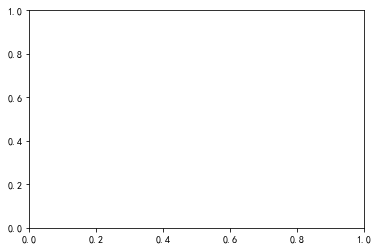

In [29]:
nx.draw_networkx(G,pos=nodes_with_geo)